In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline
%config IPCompleter.greedy=True


# Instructions
Select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [2]:
raw = pd.read_csv('Gender_StatsData.csv', low_memory=False)


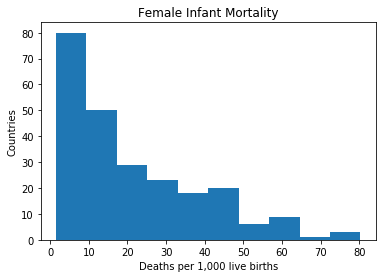

In [3]:
#Isolate  the variable I'd like to predict - female infant mortality
raw17fe = raw[raw['Indicator Code'] == 'SP.DYN.IMRT.FE.IN'][['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2017']]
raw17fe.dropna(how='any', inplace=True)

#Plot the variable
plt.hist(raw17fe['2017'])
plt.title('Female Infant Mortality')
plt.xlabel('Deaths per 1,000 live births')
plt.ylabel('Countries')
plt.show()

In [4]:
#Next, I'm going to isolate a few columns that could contribute to features and look for direct correlations.
raw17 = raw[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2017']]

#Pivot the df to make each country a row and each attribute a column
piv17 = raw17.pivot(index='Country Name', columns='Indicator Code',values='2017')
print(piv17.shape)
piv17.head()


(263, 507)


Indicator Code,FP.CPI.TOTL.ZG,FX.OWN.TOTL.FE.ZS,FX.OWN.TOTL.MA.ZS,IC.FRM.FEMM.ZS,IC.FRM.FEMO.ZS,IC.REG.COST.PC.FE.ZS,IC.REG.COST.PC.MA.ZS,IC.REG.DURS.FE,IC.REG.DURS.MA,IC.REG.PROC.FE,...,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.REG.BRTH.FE.ZS,SP.REG.BRTH.MA.ZS,SP.RUR.TOTL.FE.ZS,SP.RUR.TOTL.MA.ZS,SP.URB.TOTL.FE.ZS,SP.URB.TOTL.MA.ZS,SP.UWT.TFRT
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,7.160685,22.536495,NaN,NaN,82.3,82.3,8.0,7.0,4.0,...,35530081.0,17220190.0,48.466509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,38.102959,42.043503,NaN,NaN,12.0,12.0,5.0,5.0,5.0,...,2873457.0,1422948.0,49.520421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,29.268730,56.254936,NaN,NaN,11.1,11.1,20.0,20.0,12.0,...,41318142.0,20451754.0,49.498242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Create a table of correlations where we have at least 50 country measurements.
cor17 = piv17.corr(min_periods=50)

#Isolate just the column that shows correlation with our outcome variable, and reset the index so that the indicator
#code is callable
onecor17 = pd.DataFrame(cor17['SP.DYN.IMRT.FE.IN'])
onecor17.reset_index(level=0, inplace=True)

#Create a separate lookup-list of indicator labels so that we can review our feature options with some description
labelList = pd.DataFrame(raw[['Indicator Code', 'Indicator Name']].drop_duplicates())

#Merge labels onto the correlation list
onecor17 = onecor17.merge(labelList, how='left', on='Indicator Code')

#Get absolute value of correlations and display all over 60%
onecor17['cor'] = abs(onecor17['SP.DYN.IMRT.FE.IN'])
pd.set_option('display.max_colwidth', -1)
onecor17[onecor17.cor>.6].sort_values(by='SP.DYN.IMRT.FE.IN', ascending=False)

,Indicator Code,SP.DYN.IMRT.FE.IN,Indicator Name,cor
462,SP.DYN.IMRT.FE.IN,1.000000,"Mortality rate, infant, female (per 1,000 live births)",1.000000
463,SP.DYN.IMRT.MA.IN,0.998234,"Mortality rate, infant, male (per 1,000 live births)",0.998234
342,SH.DYN.MORT.MA,0.990816,"Mortality rate, under-5, male (per 1,000 live births)",0.990816
341,SH.DYN.MORT.FE,0.989860,"Mortality rate, under-5, female (per 1,000 live births)",0.989860
476,SP.POP.0014.TO.ZS,0.854402,Population ages 0-14 (% of total),0.854402
408,SL.EMP.VULN.FE.ZS,0.805978,"Vulnerable employment, female (% of female employment) (modeled ILO estimate)",0.805978
398,SL.EMP.SELF.FE.ZS,0.803543,"Self-employed, female (% of female employment) (modeled ILO estimate)",0.803543
388,SL.AGR.EMPL.MA.ZS,0.776804,"Employment in agriculture, male (% of male employment) (modeled ILO estimate)",0.776804
409,SL.EMP.VULN.MA.ZS,0.773107,"Vulnerable employment, male (% of male employment) (modeled ILO estimate)",0.773107
340,SH.DYN.AIDS.FE.ZS,0.771320,Women's share of population ages 15+ living with HIV (%),0.771320


In [6]:
piv17.reset_index(level=0, inplace=True)

In [7]:
#Many of the above are tautologies, so here's the few I'm selecting:
df = piv17[['Country Name','SP.DYN.IMRT.FE.IN','SL.EMP.VULN.FE.ZS','SL.EMP.SELF.FE.ZS','SL.AGR.EMPL.FE.ZS',
            'SP.POP.DPND','FX.OWN.TOTL.FE.ZS','SL.SRV.EMPL.FE.ZS','SL.EMP.WORK.FE.ZS','SH.IMM.IDPT','SH.IMM.MEAS']]

#Here's the list of what I've chosen, including the outcome variable:
labelList[labelList['Indicator Code'].isin(['Country Name','SP.DYN.IMRT.FE.IN','SL.EMP.VULN.FE.ZS','SL.EMP.SELF.FE.ZS','SL.AGR.EMPL.FE.ZS',
            'SP.POP.DPND','FX.OWN.TOTL.FE.ZS','SL.SRV.EMPL.FE.ZS','SL.EMP.WORK.FE.ZS','SH.IMM.IDPT','SH.IMM.MEAS'])]


,Indicator Code,Indicator Name
2,FX.OWN.TOTL.FE.ZS,"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)"
9,SP.POP.DPND,Age dependency ratio (% of working-age population)
105,SL.AGR.EMPL.FE.ZS,"Employment in agriculture, female (% of female employment) (modeled ILO estimate)"
109,SL.SRV.EMPL.FE.ZS,"Employment in services, female (% of female employment) (modeled ILO estimate)"
153,SH.IMM.IDPT,"Immunization, DPT (% of children ages 12-23 months)"
154,SH.IMM.MEAS,"Immunization, measles (% of children ages 12-23 months)"
260,SP.DYN.IMRT.FE.IN,"Mortality rate, infant, female (per 1,000 live births)"
341,SL.EMP.SELF.FE.ZS,"Self-employed, female (% of female employment) (modeled ILO estimate)"
370,SL.EMP.VULN.FE.ZS,"Vulnerable employment, female (% of female employment) (modeled ILO estimate)"
372,SL.EMP.WORK.FE.ZS,"Wage and salaried workers, female (% of female employment) (modeled ILO estimate)"


In [8]:
#I'm going to add a categorical attribute from a supplemental source - religion by country
# http://www.pewforum.org/2015/04/02/religious-projection-table/2010/number/all/
cat = pd.read_csv('relbycountry.csv')
#reduce the the columns we care about, removing things like regional summaries and population details
cat = cat.iloc[7:,[5,15]]
cat.rename(columns={'Country': 'Country Name', 'Primary Religion':'primRelig'}, inplace=True)
print(cat.columns, '\n\n', df.columns)


Index(['Country Name', 'primRelig'], dtype='object') 

 Index(['Country Name', 'SP.DYN.IMRT.FE.IN', 'SL.EMP.VULN.FE.ZS',
       'SL.EMP.SELF.FE.ZS', 'SL.AGR.EMPL.FE.ZS', 'SP.POP.DPND',
       'FX.OWN.TOTL.FE.ZS', 'SL.SRV.EMPL.FE.ZS', 'SL.EMP.WORK.FE.ZS',
       'SH.IMM.IDPT', 'SH.IMM.MEAS'],
      dtype='object', name='Indicator Code')


In [9]:
#Merge religion labels onto the main features dataframe
results=df.merge(cat,on='Country Name', how='left')

#some of the country names dont' match exactly, so here I assign them manually
results.loc[[14,25,33,47,48,50,77,146,157,199,211,255,257],'primRelig'] = "Christians"
results.loc[[29,65,84,111,127,233,260],'primRelig'] = "Muslims"
results.loc[[101,123,124,145],'primRelig'] = "Unaffiliated"
results.loc[[128,168],'primRelig'] = "Buddhists"
#These are the ones I'm not going to assign, just remove. Most are just regional measurements, not country level
results[results.primRelig.isna()][['Country Name', 'primRelig']]


,Country Name,primRelig
7,Arab World,NaN
37,Caribbean small states,NaN
40,Central Europe and the Baltics,NaN
60,Early-demographic dividend,NaN
61,East Asia & Pacific,NaN
62,East Asia & Pacific (IDA & IBRD),NaN
63,East Asia & Pacific (excluding high income),NaN
70,Eswatini,NaN
72,Euro area,NaN
73,Europe & Central Asia,NaN


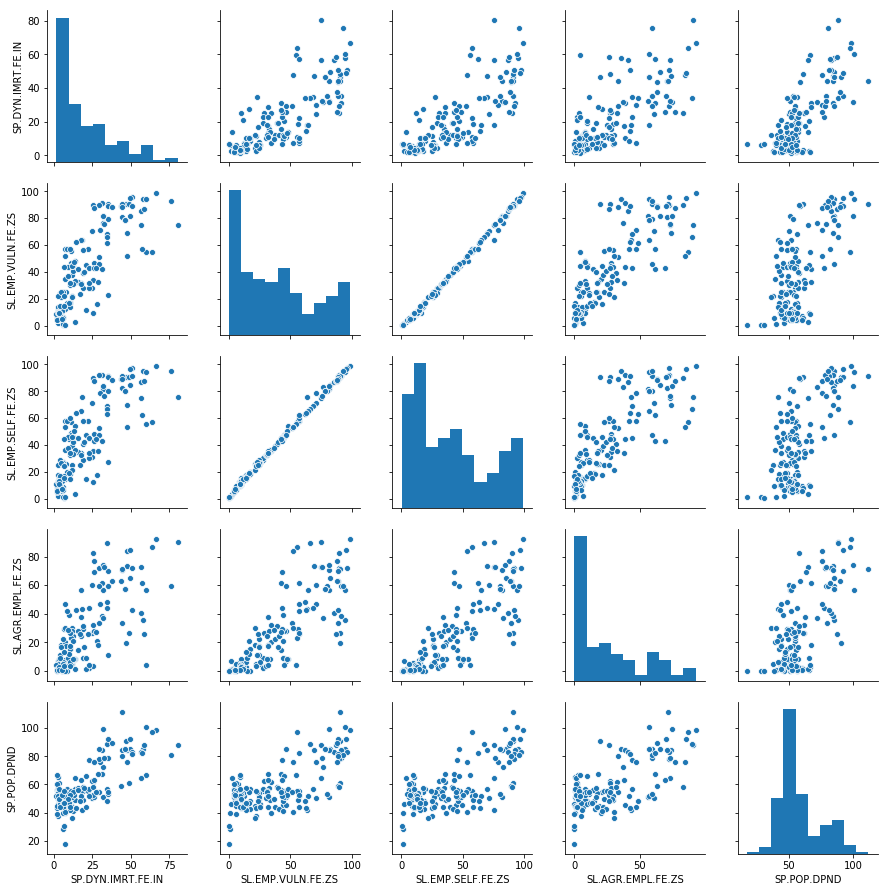

In [10]:
#Pairplot of those attributes that have positive relationships to the outcome variable
sns.pairplot(df.dropna(), vars=['SP.DYN.IMRT.FE.IN','SL.EMP.VULN.FE.ZS','SL.EMP.SELF.FE.ZS','SL.AGR.EMPL.FE.ZS','SP.POP.DPND'])

plt.show()

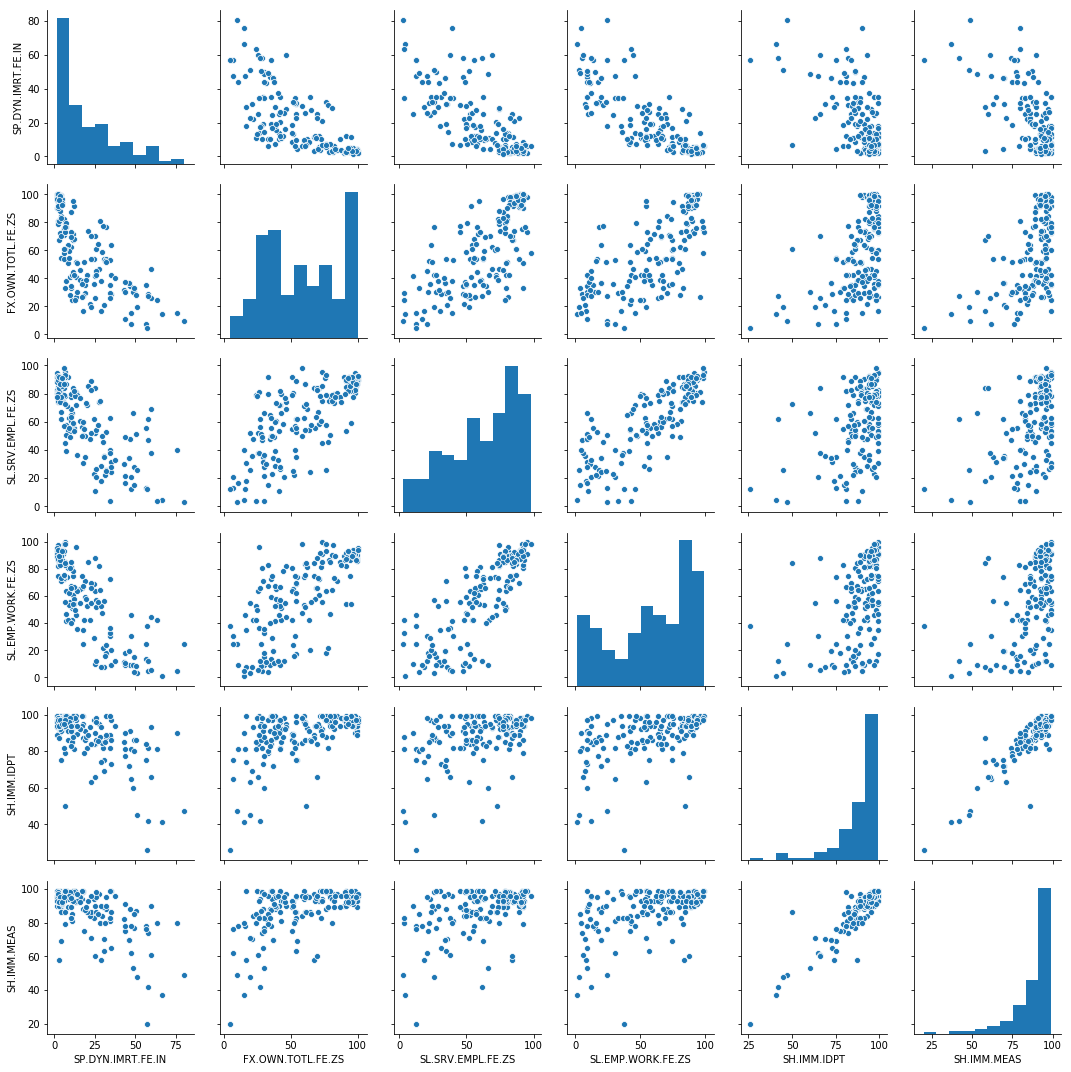

In [11]:
#Pairplot of those attributes that have negative relationships to the outcome variable
sns.pairplot(df.dropna(), vars=['SP.DYN.IMRT.FE.IN','FX.OWN.TOTL.FE.ZS','SL.SRV.EMPL.FE.ZS','SL.EMP.WORK.FE.ZS','SH.IMM.IDPT','SH.IMM.MEAS'])
plt.show()

In [12]:
#convert the categories to numeric flags
feats = pd.get_dummies(results.primRelig, dummy_na=True)
feats.head()

,Buddhists,Christians,Folk Religions,Hindus,Jews,Muslims,Unaffiliated,nan
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [13]:
#add the dummy columns to the main df
mod = pd.concat([results, feats], axis=1)

#for some reason the na column is unnamed, so I'm naming it here
mod.rename(columns={mod.columns[-1]: 'NANs'}, inplace=True)

#Theoretically, these should be a list of all the regional summaries and countries
#with missing info that we can ignore
mod[mod.NANs==1]['Country Name']

7      Arab World                                        
37     Caribbean small states                            
40     Central Europe and the Baltics                    
60     Early-demographic dividend                        
61     East Asia & Pacific                               
62     East Asia & Pacific (IDA & IBRD)                  
63     East Asia & Pacific (excluding high income)       
70     Eswatini                                          
72     Euro area                                         
73     Europe & Central Asia                             
74     Europe & Central Asia (IDA & IBRD)                
75     Europe & Central Asia (excluding high income)     
76     European Union                                    
80     Fragile and conflict affected situations          
98     Heavily indebted poor countries (HIPC)            
99     High income                                       
103    IBRD only                                         
104    IDA & I

In [14]:
#remove those
mod = mod[mod.NANs ==0]
mod.columns

Index(['Country Name', 'SP.DYN.IMRT.FE.IN', 'SL.EMP.VULN.FE.ZS',
       'SL.EMP.SELF.FE.ZS', 'SL.AGR.EMPL.FE.ZS', 'SP.POP.DPND',
       'FX.OWN.TOTL.FE.ZS', 'SL.SRV.EMPL.FE.ZS', 'SL.EMP.WORK.FE.ZS',
       'SH.IMM.IDPT', 'SH.IMM.MEAS', 'primRelig', 'Buddhists', 'Christians',
       'Folk Religions', 'Hindus', 'Jews', 'Muslims', 'Unaffiliated', 'NANs'],
      dtype='object')

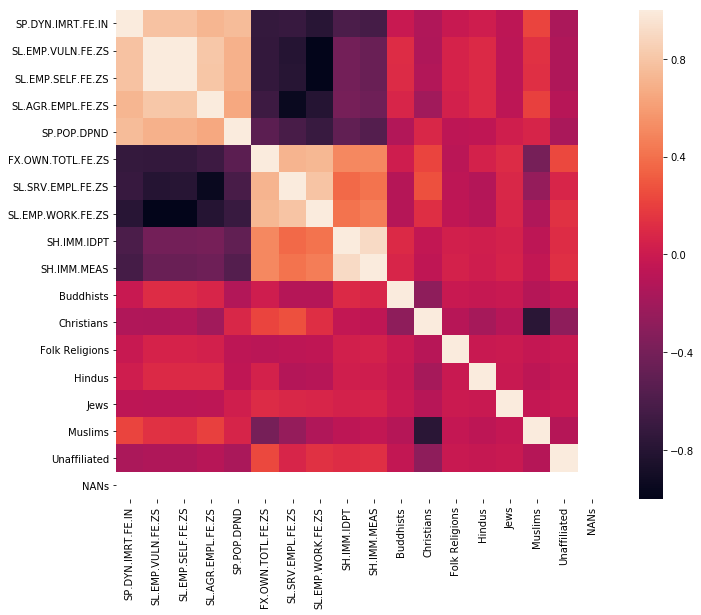

In [15]:
cormod = mod.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cormod, square=True)
plt.show()

In [16]:
#The immunization records are very correlated, so I'm going to see if combining them is an improvement

In [17]:
# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
mod2 = mod


means = mod2[['SH.IMM.IDPT','SH.IMM.MEAS']].mean(axis=0)
stds = mod2[['SH.IMM.IDPT','SH.IMM.MEAS']].std(axis=0)
mod2['immunizations'] = ((mod2[['SH.IMM.IDPT','SH.IMM.MEAS']] - means) / stds).mean(axis=1)
plotdf = mod2.loc[:,['immunizations', 'SH.IMM.IDPT','SH.IMM.MEAS']]
corr2 = plotdf.corr()
print(corr2)

               immunizations  SH.IMM.IDPT  SH.IMM.MEAS
immunizations  1.000000       0.977797     0.977797   
SH.IMM.IDPT    0.977797       1.000000     0.912175   
SH.IMM.MEAS    0.977797       0.912175     1.000000   


In [18]:
#I like that, so I'm adding that
features = pd.DataFrame(mod['Country Name'])
features['immunization'] = mod2.immunizations
features.head(2)

,Country Name,immunization
0,Afghanistan,-1.679297
1,Albania,0.703576


In [19]:
#I'll also create an immunization component for comparison:

imm = mod[['SH.IMM.IDPT','SH.IMM.MEAS']]

#I'm going to impute NA as means
imm = imm.fillna(imm.mean())

X = StandardScaler().fit_transform(imm)
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

Covariance Matrix:
 [[1.0047619  0.91651879]
 [0.91651879 1.0047619 ]]


In [20]:
# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 2).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[0.70710678]
 [0.70710678]]
Eigenvalue 1: 1.9212806963984541
----------------------------------------
Eigenvector 2: 
[[-0.70710678]
 [ 0.70710678]]
Eigenvalue 2: 0.08824311312535493
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.95608755 0.04391245]


In [21]:
#95% explained by the first component
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)
features['imm_pca'] = Y
features.head()

,Country Name,immunization,imm_pca
0,Afghanistan,-1.679297,-2.515966e+00
1,Albania,0.703576,1.054116e+00
2,Algeria,0.142900,2.140963e-01
3,American Samoa,NaN,1.492174e-15
4,Andorra,0.807387,1.209649e+00


In [22]:
#Two of the employment variables, self employment and vulnerable employment, are almost identical.
#I'll combine those into a single feature
mod3=mod
means = mod3[['SL.EMP.VULN.FE.ZS','SL.EMP.SELF.FE.ZS']].mean(axis=0)
stds = mod3[['SL.EMP.VULN.FE.ZS','SL.EMP.SELF.FE.ZS']].std(axis=0)
mod3['self_vuln_emp'] = ((mod3[['SL.EMP.VULN.FE.ZS','SL.EMP.SELF.FE.ZS']] - means) / stds).mean(axis=1)


In [23]:
features['self_vuln_emp'] = mod3.self_vuln_emp
features.head(2)

,Country Name,immunization,imm_pca,self_vuln_emp
0,Afghanistan,-1.679297,-2.515966,0.992834
1,Albania,0.703576,1.054116,0.606543


In [24]:
#alternatively I'm going to try to reduce all the employment-related fields at once and see what can be done.

emp = mod[['SL.EMP.VULN.FE.ZS','SL.EMP.SELF.FE.ZS','SL.AGR.EMPL.FE.ZS','SL.SRV.EMPL.FE.ZS','SL.EMP.WORK.FE.ZS']]
#I'm going to impute NA as means
emp = emp.fillna(emp.mean())

X = StandardScaler().fit_transform(emp)
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

Covariance Matrix:
 [[ 1.0047619   1.00248933  0.80997743 -0.80293877 -1.00248933]
 [ 1.00248933  1.0047619   0.80416946 -0.79619764 -1.0047619 ]
 [ 0.80997743  0.80416946  1.0047619  -0.9571664  -0.80416946]
 [-0.80293877 -0.79619764 -0.9571664   1.0047619   0.79619763]
 [-1.00248933 -1.0047619  -0.80416946  0.79619763  1.0047619 ]]


In [25]:
# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 5).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.45852762]
 [ 0.45756176]
 [ 0.43188735]
 [-0.42953488]
 [-0.45756176]]
Eigenvalue 1: 4.520604113366648
----------------------------------------
Eigenvector 2: 
[[ 0.33997021]
 [ 0.35741249]
 [-0.55069902]
 [ 0.57066932]
 [-0.3574125 ]]
Eigenvalue 2: 0.4527668628445861
----------------------------------------
Eigenvector 3: 
[[ 0.01409661]
 [ 0.00161451]
 [-0.71428502]
 [-0.69970921]
 [-0.0016145 ]]
Eigenvalue 3: 0.04750712671718705
----------------------------------------
Eigenvector 4: 
[[ 0.82095917]
 [-0.40359753]
 [-0.00090385]
 [ 0.01559952]
 [ 0.40359746]]
Eigenvalue 4: 0.0029314208810922344
----------------------------------------
Eigenvector 5: 
[[4.51637579e-08]
 [7.07106761e-01]
 [2.39355988e-09]
 [8.31489367e-09]
 [7.07106801e-01]]
Eigenvalue 5: 1.7450330325799459e-15
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [8.99835890e-01 9.01242097e-02 9.45639489e-03 5.835

In [26]:
#Wow, 89% explained by the first component. Easily keep that one and toss the rest.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)
features['emp'] = Y
features.head()

,Country Name,immunization,imm_pca,self_vuln_emp,emp
0,Afghanistan,-1.679297,-2.515966e+00,0.992834,2.913300e+00
1,Albania,0.703576,1.054116e+00,0.606543,1.604101e+00
2,Algeria,0.142900,2.140963e-01,-0.371480,-3.735082e-01
3,American Samoa,NaN,1.492174e-15,NaN,-4.675249e-16
4,Andorra,0.807387,1.209649e+00,NaN,-4.675249e-16


In [27]:
#I'll also try just the employment attributes that are positive correlations to our outcome variable:
emp_pos = mod[['SL.EMP.VULN.FE.ZS','SL.EMP.SELF.FE.ZS','SL.AGR.EMPL.FE.ZS']]

#I'm going to impute NA as means
emp_pos = emp_pos.fillna(emp_pos.mean())

X = StandardScaler().fit_transform(emp_pos)
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)



Covariance Matrix:
 [[1.0047619  1.00248933 0.80997743]
 [1.00248933 1.0047619  0.80416946]
 [0.80997743 0.80416946 1.0047619 ]]


In [28]:
# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.59262679]
 [-0.59147216]
 [-0.54676701]]
Eigenvalue 1: 2.7525962708328477
----------------------------------------
Eigenvector 2: 
[[-0.71172859]
 [ 0.70235812]
 [ 0.01163961]]
Eigenvalue 2: 0.0022247665209721053
----------------------------------------
Eigenvector 3: 
[[-0.37714175]
 [-0.39604766]
 [ 0.83720389]]
Eigenvalue 3: 0.2594646769318961
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [9.13183597e-01 7.38074201e-04 8.60783288e-02]


In [29]:
#91% explained by the first component. Keep that one and toss the others.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)
features['emp_pos'] = Y
features.head()

,Country Name,immunization,imm_pca,self_vuln_emp,emp,emp_pos
0,Afghanistan,-1.679297,-2.515966e+00,0.992834,2.913300e+00,-2.241306e+00
1,Albania,0.703576,1.054116e+00,0.606543,1.604101e+00,-1.199229e+00
2,Algeria,0.142900,2.140963e-01,-0.371480,-3.735082e-01,8.162874e-01
3,American Samoa,NaN,1.492174e-15,NaN,-4.675249e-16,2.998607e-16
4,Andorra,0.807387,1.209649e+00,NaN,-4.675249e-16,2.998607e-16


In [30]:
#Now I'll do the same for the 2 employment variables with negative correlations to the outcome variable

emp_neg = mod[['SL.SRV.EMPL.FE.ZS','SL.EMP.WORK.FE.ZS']]

#I'm going to impute NA as means
emp_neg = emp_neg.fillna(emp_neg.mean())

X = StandardScaler().fit_transform(emp_neg)
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)



Covariance Matrix:
 [[1.0047619  0.79619763]
 [0.79619763 1.0047619 ]]


In [31]:
# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 2).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[0.70710678]
 [0.70710678]]
Eigenvalue 1: 1.8009595397323073
----------------------------------------
Eigenvector 2: 
[[-0.70710678]
 [ 0.70710678]]
Eigenvalue 2: 0.208564269791502
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.89621209 0.10378791]


In [32]:
#~90% explained by the first component. Keep that one and toss the other.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)
features['emp_neg'] = Y
features.head()

,Country Name,immunization,imm_pca,self_vuln_emp,emp,emp_pos,emp_neg
0,Afghanistan,-1.679297,-2.515966e+00,0.992834,2.913300e+00,-2.241306e+00,-1.867255e+00
1,Albania,0.703576,1.054116e+00,0.606543,1.604101e+00,-1.199229e+00,-1.072605e+00
2,Algeria,0.142900,2.140963e-01,-0.371480,-3.735082e-01,8.162874e-01,-4.530914e-01
3,American Samoa,NaN,1.492174e-15,NaN,-4.675249e-16,2.998607e-16,3.759781e-16
4,Andorra,0.807387,1.209649e+00,NaN,-4.675249e-16,2.998607e-16,3.759781e-16


In [33]:
#There's two remaining variables, before we get to categoricals. let's see what if they can be reduced


mod4 = mod[['SP.POP.DPND','FX.OWN.TOTL.FE.ZS']]
#I'm going to impute NA as means
mod4 = mod4.fillna(mod4.mean())

X = StandardScaler().fit_transform(mod4)
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

Covariance Matrix:
 [[ 1.0047619  -0.44525822]
 [-0.44525822  1.0047619 ]]


In [34]:
# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 2).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.70710678]
 [-0.70710678]]
Eigenvalue 1: 1.450020120532495
----------------------------------------
Eigenvector 2: 
[[0.70710678]
 [0.70710678]]
Eigenvalue 2: 0.5595036889913143
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.72157399 0.27842601]


In [35]:
#This component can explain 72% of the above 2 variables. there's som eintution here; as 
# % of dependents decreases, you'd expect more of those now-independent people to have their own accounts.
#Wow, 89% explained by the first component. Easily keep that one and toss the rest.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)
features['acct_dep'] = Y
features.head()


,Country Name,immunization,imm_pca,self_vuln_emp,emp,emp_pos,emp_neg,acct_dep
0,Afghanistan,-1.679297,-2.515966e+00,0.992834,2.913300e+00,-2.241306e+00,-1.867255e+00,2.687827e+00
1,Albania,0.703576,1.054116e+00,0.606543,1.604101e+00,-1.199229e+00,-1.072605e+00,-2.761586e-02
2,Algeria,0.142900,2.140963e-01,-0.371480,-3.735082e-01,8.162874e-01,-4.530914e-01,7.213325e-01
3,American Samoa,NaN,1.492174e-15,NaN,-4.675249e-16,2.998607e-16,3.759781e-16,2.166927e-16
4,Andorra,0.807387,1.209649e+00,NaN,-4.675249e-16,2.998607e-16,3.759781e-16,2.166927e-16


In [36]:
# % Dependency, if used on it's own is more intuitive in this context as independency, so I'm going to flip it
features['independence'] = max(mod['SP.POP.DPND']) - mod['SP.POP.DPND']
features.head()

,Country Name,immunization,imm_pca,self_vuln_emp,emp,emp_pos,emp_neg,acct_dep,independence
0,Afghanistan,-1.679297,-2.515966e+00,0.992834,2.913300e+00,-2.241306e+00,-1.867255e+00,2.687827e+00,27.060503
1,Albania,0.703576,1.054116e+00,0.606543,1.604101e+00,-1.199229e+00,-1.072605e+00,-2.761586e-02,67.588275
2,Algeria,0.142900,2.140963e-01,-0.371480,-3.735082e-01,8.162874e-01,-4.530914e-01,7.213325e-01,56.619564
3,American Samoa,NaN,1.492174e-15,NaN,-4.675249e-16,2.998607e-16,3.759781e-16,2.166927e-16,NaN
4,Andorra,0.807387,1.209649e+00,NaN,-4.675249e-16,2.998607e-16,3.759781e-16,2.166927e-16,NaN


In [37]:
#The correlation heatmap indicated a stronger relationship between a country's primary religion being Muslim, and 
#account ownership. Let's create a feature that would emphacize that.

features['muslim_acct'] = mod.Muslims * mod['FX.OWN.TOTL.FE.ZS']
features.head()

,Country Name,immunization,imm_pca,self_vuln_emp,emp,emp_pos,emp_neg,acct_dep,independence,muslim_acct
0,Afghanistan,-1.679297,-2.515966e+00,0.992834,2.913300e+00,-2.241306e+00,-1.867255e+00,2.687827e+00,27.060503,7.160685
1,Albania,0.703576,1.054116e+00,0.606543,1.604101e+00,-1.199229e+00,-1.072605e+00,-2.761586e-02,67.588275,38.102959
2,Algeria,0.142900,2.140963e-01,-0.371480,-3.735082e-01,8.162874e-01,-4.530914e-01,7.213325e-01,56.619564,29.268730
3,American Samoa,NaN,1.492174e-15,NaN,-4.675249e-16,2.998607e-16,3.759781e-16,2.166927e-16,NaN,NaN
4,Andorra,0.807387,1.209649e+00,NaN,-4.675249e-16,2.998607e-16,3.759781e-16,2.166927e-16,NaN,NaN


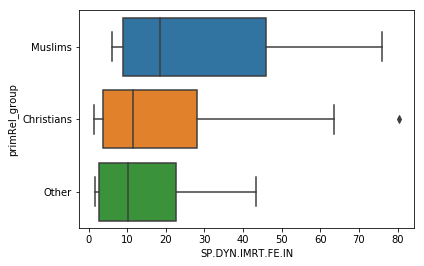

In [38]:
#Besides Christianity and Islam, no other religion has a meaningful number of countries
mod['primRel_group'] = np.where((mod.primRelig == "Muslims") | (mod.primRelig == "Christians"),mod.primRelig,'Other')

sns.boxplot(y='primRel_group', x='SP.DYN.IMRT.FE.IN', data=mod, orient="h")
plt.show()

#Based on this chart, Muslim could be a features on it's own
features['muslim'] = mod.Muslims

In [39]:
features.head()

,Country Name,immunization,imm_pca,self_vuln_emp,emp,emp_pos,emp_neg,acct_dep,independence,muslim_acct,muslim
0,Afghanistan,-1.679297,-2.515966e+00,0.992834,2.913300e+00,-2.241306e+00,-1.867255e+00,2.687827e+00,27.060503,7.160685,1
1,Albania,0.703576,1.054116e+00,0.606543,1.604101e+00,-1.199229e+00,-1.072605e+00,-2.761586e-02,67.588275,38.102959,1
2,Algeria,0.142900,2.140963e-01,-0.371480,-3.735082e-01,8.162874e-01,-4.530914e-01,7.213325e-01,56.619564,29.268730,1
3,American Samoa,NaN,1.492174e-15,NaN,-4.675249e-16,2.998607e-16,3.759781e-16,2.166927e-16,NaN,NaN,0
4,Andorra,0.807387,1.209649e+00,NaN,-4.675249e-16,2.998607e-16,3.759781e-16,2.166927e-16,NaN,NaN,0


# So which are best for a model?

* **emp** - I was surprised to find that 1 component explained 89% of the variance found in 5 attributes. this is so compelling that it seems very sensible to throw out other manipulations of these 5 attributes, including **self_vuln_emp**, **emp_pos**, and **emp_neg**. These other combinations had only marginally better info retention with more components.    
* **immunizations** - these 2 attributes are best used averaged. Because their correlations are so strong, pca might cause strong correlations, so we'll discard **imm_pca**.    
* **acct_dep** and **muslim**: At this point there are really 3 attributes left: account ownership, dependency, and religion. From these will come 2 features as combining all 3 isn't reasonable since one is categorical. I'd choose to use pca on the 2 continuous attributes, and simply keep religion as a numeric flag for groups that are significantly different from the rest, which in this case is simply countries where islam is the primary religion. The other option would be to use dependence separately (**independence**) and combine account ownership and religion instead (**muslim_acct**) but I discarded these because multiplying a continuous variable by a categorical dummy loses too much information for my preferences.


Those 4 are the only I'd recommend. I realize the assignment called for 5 features, but I didn't expect one component to knock out 5 attributes at once :)